# Seaborn - Intro

### Notes
Seaborn Gallery: https://seaborn.pydata.org/examples/index.html

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here's why you might use 

Seaborn over matplotlib:
- Simplified Syntax: Less code for complex visualizations.
- Built-in Themes: Predefined styles for attractive plots.
- Better Color Handling: Advanced palette options and usage.
- Statistical Plotting: Supports advanced plots like violin and box plots.
- Data Frames Support: Direct plotting from pandas data structures.
- Automatic Estimation: Built-in linear regression plotting.
- Faceting: Easy creation of multi-plot grids for data comparison.

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
# Copy DataFrame
job_title = 'Data Analyst'
job_country = 'United States'
df_DA = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()
df_DA = df_DA.dropna(subset='salary_year_avg')
df_DA = df_DA.explode('job_skills')

# Calculating
df_stats = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_stats_count_sort = df_stats.sort_values(by='count', ascending=False)
df_stats_median_sort = df_stats.sort_values(by='median', ascending=False)
df_stats_count_sort = df_stats_count_sort.head(10)
df_stats_median_sort = df_stats_median_sort.head(10)

### Plotting with Matplotlib

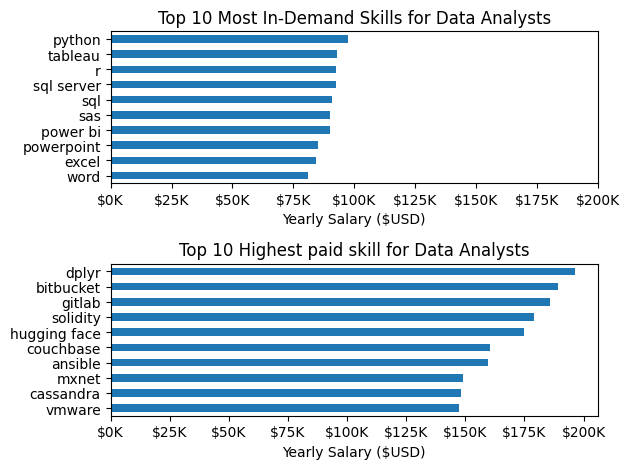

In [4]:
fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
df_stats_count_sort.sort_values(by='median',ascending=False).plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[0].invert_yaxis()
ax[0].set_xlabel('Yearly Salary ($USD)')
ax[0].set_ylabel('')
ax[0].set_xlim(0,200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# Top 10 Most In-Demand Skills for Data Analysts
df_stats_median_sort.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest paid skill for Data Analysts')
ax[1].invert_yaxis()
ax[1].set_xlabel('Yearly Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

fig.tight_layout()

### Plotting with Seaborn

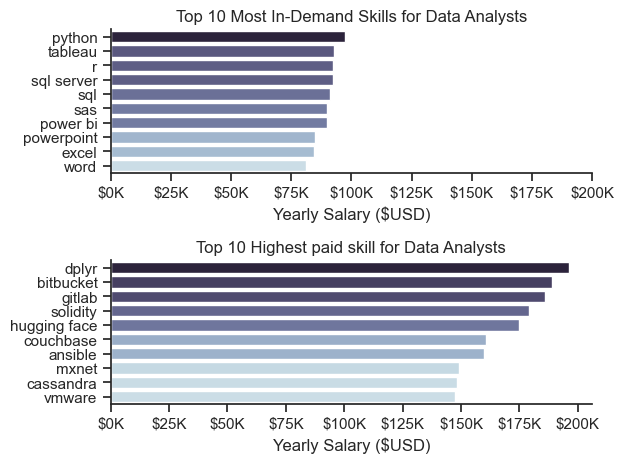

In [7]:
import seaborn as sns

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.set_palette("pastel")

# Top 10 Highest Paid Skills for Data Analysts
df_stats_count_sort = df_stats_count_sort.sort_values(by='median', ascending=False)
sns.barplot(data=df_stats_count_sort, x='median', y=df_stats_count_sort.index, ax=ax[0], hue='median', palette="ch:s=.25,rot=-.25",)
sns.set_theme('notebook', style='ticks')
sns.despine()
ax[0].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[0].legend().remove()
ax[0].set_xlabel('Yearly Salary ($USD)')
ax[0].set_ylabel('')
ax[0].set_xlim(0,200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_stats_median_sort, x='median', y=df_stats_median_sort.index, ax=ax[1], hue='median', palette="ch:s=.25,rot=-.25",)
sns.set_theme('notebook', style='ticks')
sns.despine()
ax[1].set_title('Top 10 Highest paid skill for Data Analysts')
ax[1].legend().remove()
ax[1].set_xlabel('Yearly Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# plt.suptitle('Top 10 Highest paid skill for Data Analyst')
fig.tight_layout()